In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [161]:
log = pd.read_csv("parseddata0028.csv")
log = log[['Time','D2_Motor_Speed','D1_Commanded_Torque']]
log = log[log['D2_Motor_Speed']>=0]
# log.interpolate(inplace=True)

# log = log[log['D1_Commanded_Torque']>=0]

log=log[log['D2_Motor_Speed']<=6000]
log
log['Time'] = (log['Time']-log['Time'].min())/1000
log

,Time,D2_Motor_Speed,D1_Commanded_Torque
21,0.000,0.0,NaN
24,0.036,0.0,NaN
26,0.259,0.0,NaN
50,0.587,0.0,NaN
61,0.721,0.0,NaN
...,...,...,...
108040,2092.750,0.0,NaN
108042,2092.768,0.0,NaN
108045,2092.786,0.0,NaN
108075,2093.379,0.0,NaN


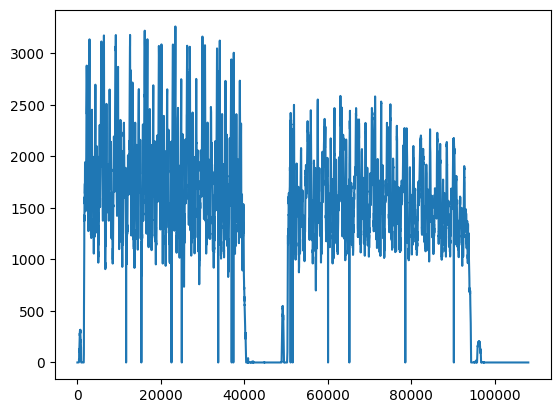

In [162]:
plt.plot(log['D2_Motor_Speed'])


In [163]:
cd_open = 0.68167
cd_closed = 1.815
tire_radius = 0.229 # meters
final_drive = 10/30


,Time,D2_Motor_Speed,D1_Commanded_Torque,elapsed,car_speed
21,0.000,0.0,NaN,NaN,0.0
24,0.036,0.0,NaN,0.036,0.0
26,0.259,0.0,NaN,0.223,0.0
50,0.587,0.0,NaN,0.328,0.0
61,0.721,0.0,NaN,0.134,0.0
...,...,...,...,...,...
108040,2092.750,0.0,NaN,0.288,0.0
108042,2092.768,0.0,NaN,0.018,0.0
108045,2092.786,0.0,NaN,0.018,0.0
108075,2093.379,0.0,NaN,0.593,0.0


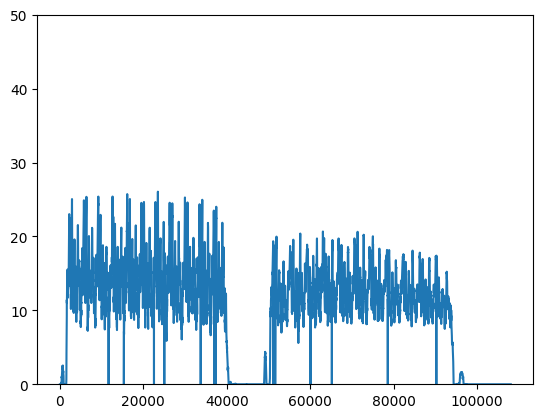

In [164]:
log['elapsed']=log['Time'].diff()
log['car_speed'] = final_drive*log['D2_Motor_Speed']*tire_radius*2*3.14/60
plt.plot(log['car_speed'])
plt.ylim((0,50))
log


1.518323060596087

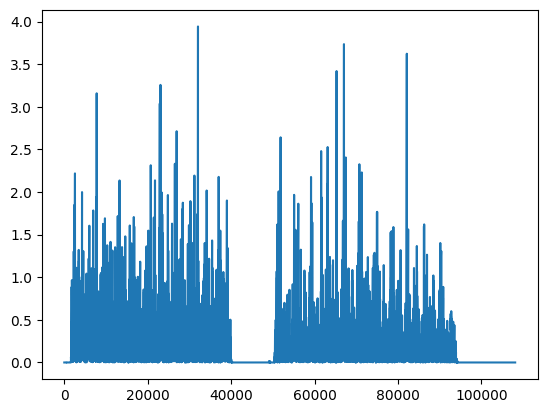

In [165]:
#  drag = 0.5 * (v**2) * rho * self.cd * self.area
rho=1.226
area = 1.146118
area_open = .9606706
speed_threshold = 20
log['drag'] = np.where(log['car_speed']<=speed_threshold, 0.5 * (log['car_speed']**2) * rho * cd_closed * area, 0.5 * (log['car_speed']**2) * rho * cd_open * area_open)
log['drag_pwr'] = log['drag']*log['car_speed']
log['drag_energy']=log['drag_pwr']*log['elapsed']/(60*60)
plt.plot(log['drag_energy'])
joe = log['drag_energy'].sum()
joe/1000

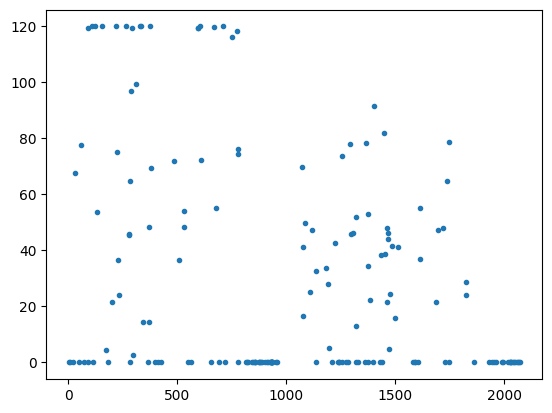

In [166]:
plt.scatter(log['Time'],log['D1_Commanded_Torque'],marker='.')

0.5835513489190143

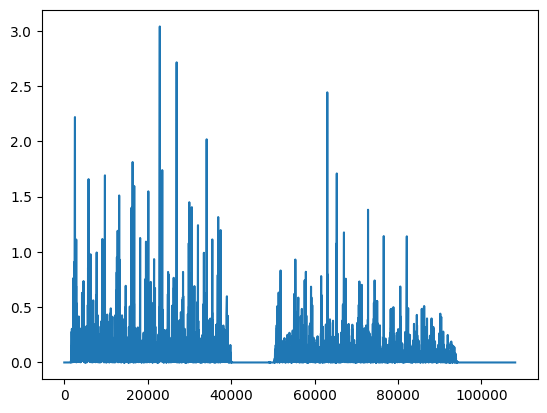

In [167]:
torque_threshold = 122222
log['drag'] = np.where(log['D1_Commanded_Torque']<=torque_threshold, 0.5 * (log['car_speed']**2) * rho * cd_closed * area, 0.5 * (log['car_speed']**2) * rho * cd_open * area_open)
log['drag_pwr'] = log['drag']*log['car_speed']
log['drag_energy']=log['drag_pwr']*log['elapsed']/(60*60)
plt.plot(log['drag_energy'])
joe = log['drag_energy'].sum()
joe/1000